### Do the human error messages have a positive effect on the exercises being made?

- Do people make the same mistake less where there is a human error message added?


#### Importing our libraries and cleaned data

In [114]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from cleaning import read_data, clean_linting_results, clean_review_test_results, clean_data_reviewss, clean_data_exercises, clean_data_code_blast_tests

read_linting_results, read_review_test_results, read_reviews, data_tests, read_code_blast_tests, read_exercises, data_implementation_exercise = read_data()

data_linting_result = clean_linting_results(read_linting_results)
data_review_test_results = clean_review_test_results(read_review_test_results)
data_reviews = clean_data_reviewss(read_reviews)
data_exercises = clean_data_exercises(read_exercises)
data_code_blast_tests = clean_data_code_blast_tests(read_code_blast_tests)


### We calculate the effect of human error messages

In [119]:
# We select the column we want to use
df_errors = data_review_test_results[['blast_review_id', 'human_error_message']]

# We merge these columns with the data_reviews dataset
df_errors = df_errors.merge(data_reviews[['id', 'implementation_id']], left_on='blast_review_id', right_on='id')

# We fill the exercises without a human error message with a NaN value
df_errors['human_error_message'].fillna('NaN', inplace=True)

# We group the values based on implementation_id and human_error_message, and count the times a exercise has been resubmitted.
df_grouped = df_errors.groupby(['implementation_id', 'human_error_message']).size().reset_index(name='count')

# We filter so we count how many times a excersice has been resubmitted 2 or more times
df_multiple_submissions = df_grouped[df_grouped['count'] >= 2]

# We create 2 dataframes for the data with and without error message
df_with_message = df_multiple_submissions[df_multiple_submissions['human_error_message'] != 'NaN']
df_without_message = df_multiple_submissions[df_multiple_submissions['human_error_message'] == 'NaN']

# We count the amount of resubmitted excersises of these 2 dataframes
total_with_message = df_with_message['count'].sum()
total_without_message = df_without_message['count'].sum()

# We count the total amount of values of both dataframes
total_assignments_with_message = len(df_grouped[df_grouped['human_error_message'] != 'NaN'])
total_assignments_without_message = len(df_grouped[df_grouped['human_error_message'] == 'NaN'])

#  We calculate the amount of resubmitted exercises based on total of each group
normalized_total_with_message = total_with_message / total_assignments_with_message
normalized_total_without_message = total_without_message / total_assignments_without_message

# We calculate the difference between these 2
Difference_with_and_without_errormessage = normalized_total_without_message -normalized_total_with_message

# Round the values ​​to 2 decimal places
normalized_total_with_message = round(normalized_total_with_message, 2)
normalized_total_without_message = round(normalized_total_without_message, 2)
Difference_with_and_without_errormessage = round(Difference_with_and_without_errormessage, 2)

# We print our values
print(f'Total amount of resubmits (2 or more) with human_error_message: {normalized_total_with_message}')
print(f'Total amount of resubmits (2 or more) without human_error_message: {normalized_total_without_message}')
print(f'Exercises without human_error_message get resubmitted {Difference_with_and_without_errormessage}x more than exercises with human_error_message')

Total amount of resubmits (2 or more) with human_error_message: 1.6
Total amount of resubmits (2 or more) without human_error_message: 7.22
exercises without human_error_message get resubmitted 5.62x more than exercises with human_error_message


Exercises without a human error message are resubmitted significantly more frequently (7.22 times) compared to those with a human error message (1.6 times).
The calculated difference (5.62) indicates that assignments without a human error message are, on average, 5.62 times more likely to be resubmitted compared to those with a human error message.

This suggests that there might be a correlation between the presence of a human error message and the likelihood of an exercise being resubmitted. The higher resubmission rate for exercises without a human error message could indicate a need for clearer instructions or communication regarding errors in the submission process

### Visualize the effect of human error message to exercises

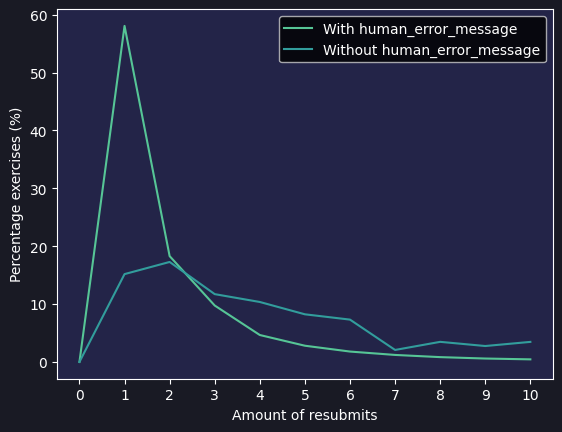

In [117]:
# We delete the filter to only get values from exercises that have been resubmitted 2 or more times
df_grouped_all = df_grouped.copy()

# We create a list for the x axis values
x_values = list(range(11))

# We create the y-values for exercises with and without human error message
y_values_with_message = [len(df_grouped_all[(df_grouped_all['human_error_message'] != 'NaN') & (df_grouped_all['count'] == count)]) / total_assignments_with_message * 100 for count in x_values]
y_values_without_message = [len(df_grouped_all[(df_grouped_all['human_error_message'] == 'NaN') & (df_grouped_all['count'] == count)]) / total_assignments_without_message * 100 for count in x_values]

fig, ax = plt.subplots(facecolor='#191A24')


# We plot the lines
plt.plot(x_values, y_values_with_message, label='With human_error_message', color='#56C596')
plt.plot(x_values, y_values_without_message, label='Without human_error_message', color='#329D9C')

# We add labels to the axis and add a legend
plt.xlabel('Amount of resubmits')
plt.ylabel('Percentage exercises (%)')
plt.legend()

# We make the x axis go up in steps of 1 
plt.xticks(x_values)

ax.set_facecolor('#232448')


# We plot the visual
plt.show()

We see that exercises with a human error message get declined a lot (~58%) compared to exercises without human error message(~15%). But after the first mistake we see a huge drop in resubmitted exercises(~40%) where there is a human error message. After that we see that the human error message exercises gets resubmitted less then exercises without one.